In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import pandas as pd  
import seaborn as sns 
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandasql as ps

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

### **Import Library**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Load data and drop all columns except ID, X Coordinate, Y Coordinate**

In [0]:
X = pd.read_csv('/content/drive/My Drive/CS267 Project Data/top2000crimes.csv')
X1 = X.drop(columns=[ 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code','Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'])


### **Download the cleaned data**

In [0]:
from google.colab import files
X1.to_csv('Clean.csv')
# files.download('Clean.csv')
X1.columns

Index(['ID', 'X Coordinate', 'Y Coordinate'], dtype='object')

### **Use K-Means Clustering Algorithm**

In [0]:
km = KMeans(n_clusters=7, max_iter=300, random_state=0).fit(X1)
X1['cluster'] = km.labels_
X1.sort_values('cluster')
centroids = km.cluster_centers_
centroids
# X1

array([[9.99303430e+06, 1.18494365e+06, 1.85686743e+06, 2.26485497e-14],
       [9.99317762e+06, 1.16319016e+06, 1.93074211e+06, 1.00000000e+00],
       [9.99316039e+06, 1.17347035e+06, 1.89940710e+06, 2.00000000e+00],
       [9.99306627e+06, 1.15023966e+06, 1.89830598e+06, 3.00000000e+00],
       [9.99306467e+06, 1.16158090e+06, 1.86504480e+06, 4.00000000e+00],
       [9.99314963e+06, 1.13989648e+06, 1.91962424e+06, 5.00000000e+00],
       [9.99314733e+06, 1.17777870e+06, 1.83207002e+06, 6.00000000e+00]])

In [0]:
from sklearn import metrics
metrics.silhouette_score(X1, km.labels_)

0.40067708471648983

### **Elbow score**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


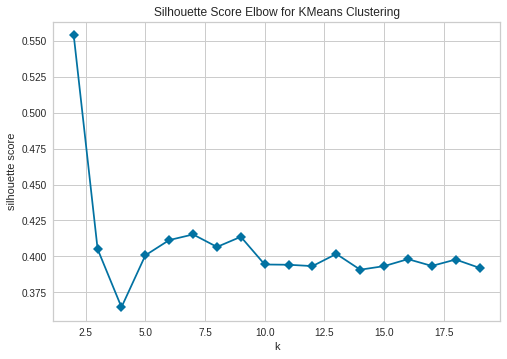

In [0]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
visualizer.fit(X1)    
visualizer.poof()

### **Plot clusters**

Text(0, 0.5, 'Y Coordinate')

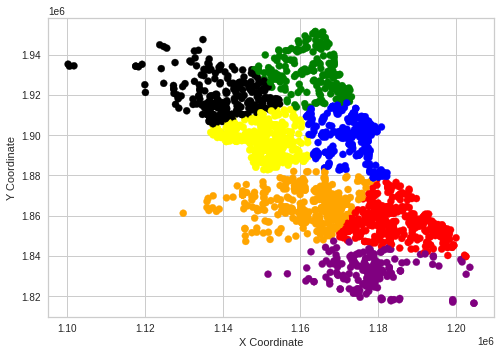

In [0]:
colors = np.array(['red','green','blue','yellow','orange', 'black', 'purple'])
plt.scatter(X1['X Coordinate'],X1['Y Coordinate'], c=colors[X1.cluster], s=50)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')